In [19]:
# 패키지 설치

import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

In [21]:
# 현재 과제에 필요한 과거 코드들

# 붓꽃 데이터 불러오기

iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # 행은 다 갖고 오고 열은 petal length(2인덱스) 와 petal width(3인덱스)만 가져옴.
y = iris.target # 실제로 맞춰야 하는 값

print("클래스 레이블 : {0}".format(np.unique(y))) # 타겟값의 레이블을 중복없게 가져옴
# 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica 

# 테스트 사이즈를 30%로 설정하고 데이터 shuffle을 위한 시드값을 1로 설정, data의 비율은 유지
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify=y)

# 결정 경계 그래프 함수

def plot_decision_regions(X, y, classifier, test_index = None, resolution= 0.02):
    
    # 마커와 컬러맵을 설정
    markers = ('s', 'x', 'o', '^', 'v') # 마커 설정
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan') # 색깔 설정
    cmap = ListedColormap(colors[:len(np.unique(y))]) # y 레이블 개수에 맞춰 색을 매핑
    
    # 결정 경계(+, -로 구분)
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # petal length에 해당하는 최솟값과 최댓값
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # petal width에 해당하는 최솟값과 최댓값
    
    # 빈 그래프부분에 그리드 생성
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution)) # 0.2간격의 바둑판 모양으로 x, y축에 최솟값, 최댓값 범위로 생성
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # xx1과 xx2를 1차원 배열로 변경 후 계단 함수를 돌려서 1과 -1로 구분
    Z = Z.reshape(xx1.shape) # 그렇게 생성된 걸 다시 xx1의 차원 수에 맞춰서 다시 변경
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) # 색으로 구분된 등고선 맵 그리기
    plt.xlim(xx1.min(), xx1.max()) # x 축 설정
    plt.ylim(xx2.min(), xx2.max()) # y 축 설정
    
    # 산점도 그리기
    for index, column in enumerate(np.unique(y)):
        plt.scatter(x=X[y == column, 0], # X는 petal length와 width를 갖고 있음. 거기서 y(레이블 0, 1, 2의 )과 동일한 열의 데이터만 행으로 가져오고 열은 petal length를 가져옴 
                    y=X[y == column, 1], # y(레이블 0, 1, 2의 )과 동일한 열의 데이터만 행으로 가져오고 열은 petal width를 가져옴 
                    alpha=0.8, # 점 크기
                    c=colors[index],
                    marker=markers[index], 
                    label=column, 
                    edgecolor='black')
        
    # 테스트 샘플을 부각하여 그립니다.
    if test_index: # 특정 인덱스일 경우엔 테스트 데이터를 추출해서 점의 크기나 미적으로 변화시켜 그려줌
        X_test, y_test = X[test_index, :], y[test_index]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

클래스 레이블 : [0 1 2]


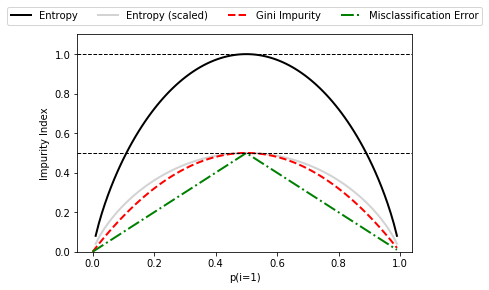

In [2]:
# 지니계수
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p)) # 지니계수 구하는 함수(p는 확률)

# 앤트로피
def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p)) # 엔트로피 구하는 함수 (확률 변수의 불확실성)

# 분류 오차
def error(p):
    return 1 - np.max([p, 1 - p]) # 분류 오차 구하는 함수

x = np.arange(0.0, 1.0, 0.01) # 0부터 1까지 0.01의 간격으로 리스트 군집을 만들어줌.

ent = [entropy(p) if p != 0 else None for p in x] # 값이 0일 때를 제외한 x리스트에 있는 모든 원소를 entropy함수에 넣어서 다른 리스트를 반환
sc_ent = [e * 0.5 if e else None for e in ent] # 위에서 반환된 리스트의 원소들 중 만약 e가 존재하면 곱하기 0.5를 해서 반환(scaled entropy)
err = [error(i) for i in x] # ent리스트와 동일하게 반복문 돌리면서 error함수에 넣어서 다른 리스트를 반환

fig = plt.figure() # 그래프 프레임을 그림
ax = plt.subplot(111) # 1x1 그리드 

# 엔트로피(검은색), 확장 엔트로피(연회색), 지니 불순도(붉은색), 분류 오차(초록색)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], # 실제 그래프에 들어가는 값들
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 'Misclassification Error'], # 각 선의 이름들
                          ['-', '-', '--', '-.'], # 선의 모양(점선)
                          ['black', 'lightgray', 'red', 'green', 'cyan']): # 4가지의 리스트를 반복문이 돌 때마다 묶어서 반환해줌.
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c) # 엔트로피, 확장 엔트로피, 지니지수, 분류오차 4가지 중 해당하는 걸 각각 그려줌.

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--') # y = 0.5를 나타내는 점선을 그려줌
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--') # y = 1을 나타내는 점선을 그려줌
plt.ylim([0, 1.1]) # y축 범위
plt.xlabel('p(i=1)') # x 레이블
plt.ylabel('Impurity Index') # y 레이블
plt.show()

In [3]:
# 119pg 3-18

#지니지수
gini_parent = 1 - ((1/2)**2 + (1/2)**2)

a_gini_left = 1- ((3/4)**2 + (1/4)**2)
a_gini_right = 1- ((1/4)**2 + (3/4)**2)
a_gini_result = gini_parent - (4/8)*a_gini_left - (4/8)*a_gini_right

b_gini_left = 1- ((2/6)**2 + (4/6)**2)
b_gini_right = 1 - (1**2 + 0**2)
b_gini_result = gini_parent - (6/8)*b_gini_left - (2/8) * b_gini_right

print("A의 지니지수 : {0}".format(a_gini_result))
print("B의 지니지수 : {:.3}".format(b_gini_result))
print()

# 분류 오차
ce_parent = 1 - (1/2)

a_ce_left = 1 - (3/4)
a_ce_right = 1 - (3/4)
a_ce_result = ce_parent - (4/8)* a_ce_left - (4/8) * a_ce_right

b_ce_left = 1 - (4/6)
b_ce_right = 1 - 1
b_ce_result = ce_parent - (6/8) * b_ce_left - (2/8) * b_ce_right

print("A의 분류오차 : {0}".format(a_ce_result))
print("B의 분류오차 : {0}".format(b_ce_result))
print()

# 엔트로피
ent_parent = - ((1/2)* np.log2(1/2) + (1/2) * np.log2(1/2))

a_ent_left = - (3/4 * np.log2(3/4) + (1/4) * np.log2(1/4))
a_ent_right = - (1/4 * np.log2(1/4) + (3/4) * np.log2(3/4))
a_ent_result = ent_parent - (4/8) * a_ent_left - (4/8) * a_ent_right

b_ent_left = - (2/6 * np.log2(2/6) + (4/6) * np.log2(4/6))
b_ent_right = - (2/2 * np.log2(2/2) + (0/2) * 0)            # - (2/2 * np.log2(2/2) + (0/2) * np.log2(0/2))
b_ent_result = ent_parent - (6/8) * b_ent_left - (2/8) * b_ent_right

print("A의 엔트로피 : {:.2}".format(a_ent_result))
print("B의 엔트로피 : {:.2}".format(b_ent_result))
print()

A의 지니지수 : 0.125
B의 지니지수 : 0.167

A의 분류오차 : 0.25
B의 분류오차 : 0.25

A의 엔트로피 : 0.19
B의 엔트로피 : 0.31



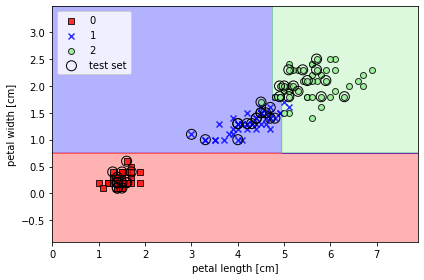

In [22]:
# 결정트리 만들기


tree = DecisionTreeClassifier(criterion='gini', # 지니지수를 기준으로 
                              max_depth=4,      # 트리의 노드 깊이를 최대 4로 제한
                              random_state=1)   # 난수 
tree.fit(X_train, y_train) # 위 조건을 기반으로 생성된 트리 생성 객체를 iris 데이터를 학습시킴

X_combined = np.vstack((X_train, X_test)) # x 훈련 데이터와 x테스트 데이터를 수직으로 붙임
y_combined = np.hstack((y_train, y_test)) # y 훈련 데이터와 y 테스트 데이터를 수평으로 붙임
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_index=range(105, 150)) # 결정경계 그래프를 그려서 결합된 데이터들 간의 경계를 구분 시키고 테스트 데이터는 강조해서 그려줌.

plt.xlabel('petal length [cm]') # x 축의 이름
plt.ylabel('petal width [cm]') # y 축의 이름
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()